In [ ]:
accepted = df[df['status'] == 'Accepted']


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import matplotlib.image as mpimg
import geopandas as gpd
from fuzzywuzzy import process
import networkx as nx
from collections import Counter 
import numpy as np 
from IPython.display import SVG, display 

/opt/anaconda3/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_excel('/Users/fernandoareias/Documents/dev/mestrado/disciplinas/PPGA41/exports/study_selection.xls')
df.shape[0]

396

In [ ]:
rejected = df[df['status'] == 'Rejected']


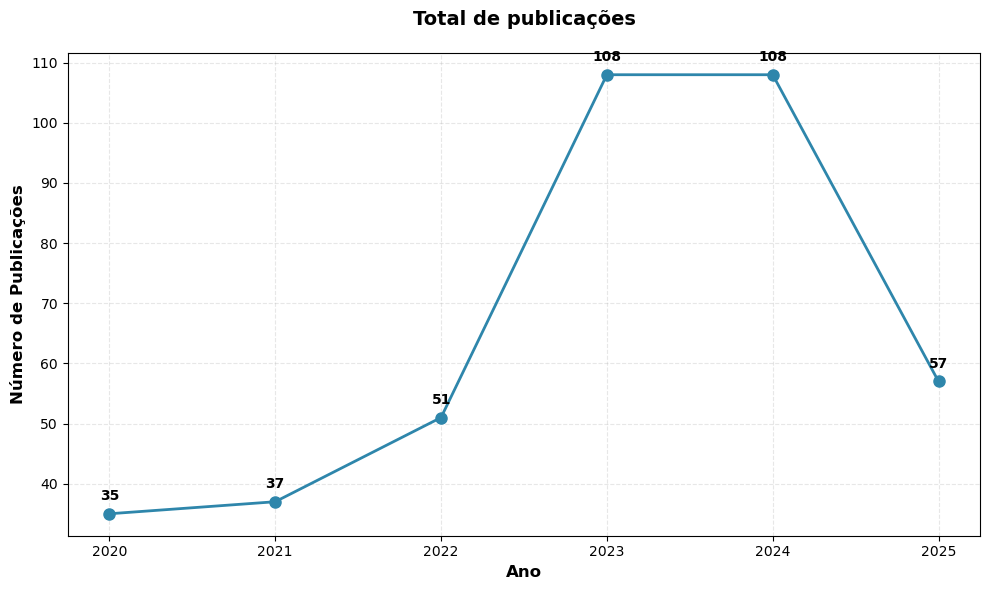

In [69]:
df_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(df_per_year.index, df_per_year.values, 
         marker='o', linewidth=2, markersize=8, color='#2E86AB')

plt.title('Total de publicações', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Número de Publicações', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')

for x, y in zip(df_per_year.index, df_per_year.values):
    plt.annotate(str(y), (x, y), textcoords="offset points", 
                xytext=(0,10), ha='center', fontweight='bold')

plt.xticks(df_per_year.index)

plt.tight_layout()
plt.show()


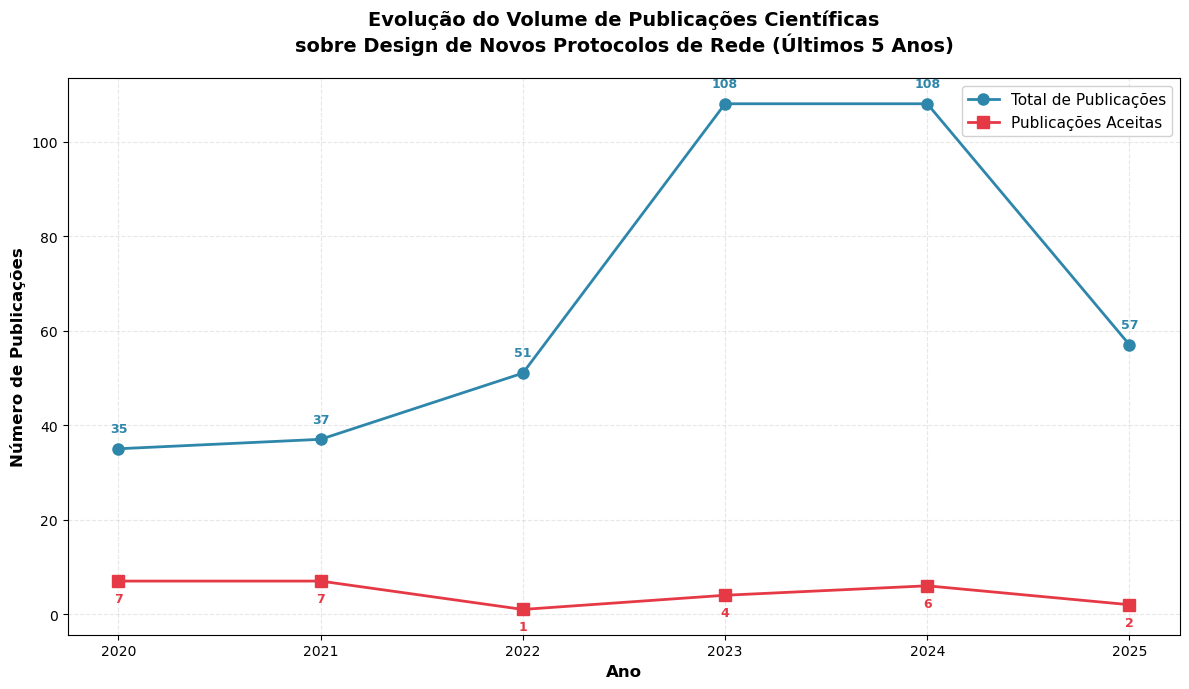


QS1: Evolução do Volume de Publicações (Últimos 5 Anos)

Total GERAL de publicações: 396
Total de publicações ACEITAS: 27
Taxa de aceitação: 6.8%

Ano      Total        Aceitas      Taxa Aceitação
--------------------------------------------------
2020     35           7              20.0%
2021     37           7              18.9%
2022     51           1               2.0%
2023     108          4               3.7%
2024     108          6               5.6%
2025     57           2               3.5%

Média anual (Total): 66.0 publicações
Média anual (Aceitas): 4.5 publicações


In [71]:
df_per_year = df['year'].value_counts().sort_index()

publications_per_year = accepted['year'].value_counts().sort_index()

plt.figure(figsize=(12, 7))

plt.plot(df_per_year.index, df_per_year.values, 
         marker='o', linewidth=2, markersize=8, color='#2E86AB',
         label='Total de Publicações')

plt.plot(publications_per_year.index, publications_per_year.values, 
         marker='s', linewidth=2, markersize=8, color='#E63946',
         label='Publicações Aceitas')

plt.title('Evolução do Volume de Publicações Científicas\nsobre Design de Novos Protocolos de Rede (Últimos 5 Anos)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Ano', fontsize=12, fontweight='bold')
plt.ylabel('Número de Publicações', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(loc='best', fontsize=11, framealpha=0.9)

for x, y in zip(df_per_year.index, df_per_year.values):
    plt.annotate(str(y), (x, y), textcoords="offset points", 
                xytext=(0, 12), ha='center', fontweight='bold', 
                color='#2E86AB', fontsize=9)

for x, y in zip(publications_per_year.index, publications_per_year.values):
    plt.annotate(str(y), (x, y), textcoords="offset points", 
                xytext=(0, -15), ha='center', fontweight='bold', 
                color='#E63946', fontsize=9)

all_years = sorted(set(df_per_year.index) | set(publications_per_year.index))
plt.xticks(all_years)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("QS1: Evolução do Volume de Publicações (Últimos 5 Anos)")
print("="*70)
print(f"\nTotal GERAL de publicações: {df_per_year.sum()}")
print(f"Total de publicações ACEITAS: {publications_per_year.sum()}")
print(f"Taxa de aceitação: {(publications_per_year.sum()/df_per_year.sum()*100):.1f}%")

print(f"\n{'Ano':<8} {'Total':<12} {'Aceitas':<12} {'Taxa Aceitação'}")
print("-" * 50)
for year in all_years:
    total = df_per_year.get(year, 0)
    aceitas = publications_per_year.get(year, 0)
    taxa = (aceitas/total*100) if total > 0 else 0
    print(f"{year:<8} {total:<12} {aceitas:<12} {taxa:>6.1f}%")

print(f"\nMédia anual (Total): {df_per_year.mean():.1f} publicações")
print(f"Média anual (Aceitas): {publications_per_year.mean():.1f} publicações")

In [49]:
rejection_table = rejected['selection_criteria'].value_counts().reset_index()
rejection_table.columns = ['Tipo de Reprovação', 'Quantidade']

rejection_table['Percentual (%)'] = (rejection_table['Quantidade'] / rejection_table['Quantidade'].sum() * 100).round(2)

total_row = pd.DataFrame({
    'Tipo de Reprovação': ['TOTAL'],
    'Quantidade': [rejection_table['Quantidade'].sum()],
    'Percentual (%)': [100.00]
})

rejection_table = pd.concat([rejection_table, total_row], ignore_index=True)

print(rejection_table)

                   Tipo de Reprovação  Quantidade  Percentual (%)
0               Estudo fora do escopo         340           92.39
1  Estudos sencundários ou terciários          18            4.89
2                          Sem acesso           8            2.17
3                              Livros           1            0.27
4           Estudos anteriores a 2020           1            0.27
5                               TOTAL         368          100.00


In [53]:
cross_tab = pd.crosstab(rejected['source'], 
                        rejected['selection_criteria'], 
                        margins=True, 
                        margins_name='TOTAL')

cross_tab_pct = pd.crosstab(rejected['source'], 
                            rejected['selection_criteria'], 
                            normalize='index') * 100

cross_tab_pct = cross_tab_pct.round(2)

cross_tab_pct['TOTAL'] = 100.00

print("Tabela de Percentuais:")
print(cross_tab_pct)

print("\n" + "="*80 + "\n")

print("Tabela com Contagens e Percentuais:")
for source in rejected['source'].unique():
    print(f"\n{source}:")
    source_data = rejected[rejected['source'] == source]
    counts = source_data['selection_criteria'].value_counts()
    pcts = (counts / counts.sum() * 100).round(2)
    
    result = pd.DataFrame({
        'Quantidade': counts,
        'Percentual (%)': pcts
    })
    print(result)

Tabela de Percentuais:
selection_criteria    Estudo fora do escopo  Estudos anteriores a 2020  \
source                                                                   
ACM Digital Library                   92.55                       0.29   
IEEE Digital Library                 100.00                       0.00   
Web of Science                         0.00                       0.00   

selection_criteria    Estudos sencundários ou terciários  Livros  Sem acesso  \
source                                                                         
ACM Digital Library                                 5.16    0.29        1.72   
IEEE Digital Library                                0.00    0.00        0.00   
Web of Science                                      0.00    0.00      100.00   

selection_criteria    TOTAL  
source                       
ACM Digital Library   100.0  
IEEE Digital Library  100.0  
Web of Science        100.0  


Tabela com Contagens e Percentuais:

IEEE Digital Lib

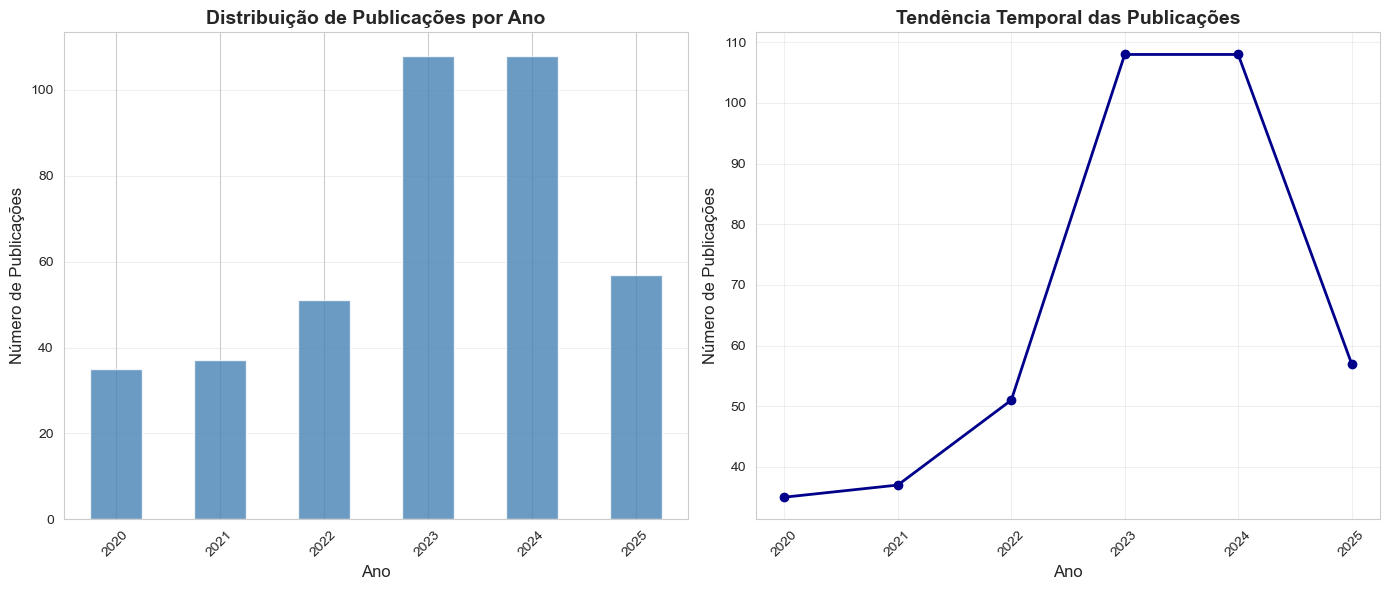

ESTATÍSTICAS TEMPORAIS
Total de publicações com ano válido: 396
Período analisado: 2020 - 2025
Ano com mais publicações: 2023 (108 publicações)
Média de publicações por ano: 66.00
Mediana: 54.00

Top 5 anos com mais publicações:
year
2020     35
2021     37
2022     51
2023    108
2024    108


In [23]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df_temporal = df.dropna(subset=['year'])
df_temporal = df_temporal[df_temporal['year'] > 1900] 

plt.figure(figsize=(14, 6))
publicacoes_por_ano = df_temporal['year'].value_counts().sort_index()

plt.subplot(1, 2, 1)
publicacoes_por_ano.plot(kind='bar', color='steelblue', alpha=0.8)
plt.title('Distribuição de Publicações por Ano', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Publicações', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
publicacoes_por_ano.plot(kind='line', marker='o', color='darkblue', linewidth=2, markersize=6)
plt.title('Tendência Temporal das Publicações', fontsize=14, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Publicações', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('distribuicao_temporal_publicacoes.png', dpi=300, bbox_inches='tight')
plt.show()

print("="*60)
print("ESTATÍSTICAS TEMPORAIS")
print("="*60)
print(f"Total de publicações com ano válido: {len(df_temporal)}")
print(f"Período analisado: {int(df_temporal['year'].min())} - {int(df_temporal['year'].max())}")
print(f"Ano com mais publicações: {int(publicacoes_por_ano.idxmax())} ({publicacoes_por_ano.max()} publicações)")
print(f"Média de publicações por ano: {publicacoes_por_ano.mean():.2f}")
print(f"Mediana: {publicacoes_por_ano.median():.2f}")
print("\nTop 5 anos com mais publicações:")
print(publicacoes_por_ano.head().to_string())

/var/folders/3b/wr0ldr2n5ggbhcf71_q8cv600000gn/T/ipykernel_6396/2188474150.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aceitos['relevance_score'] = df_aceitos.apply(calcular_score_relevancia, axis=1)


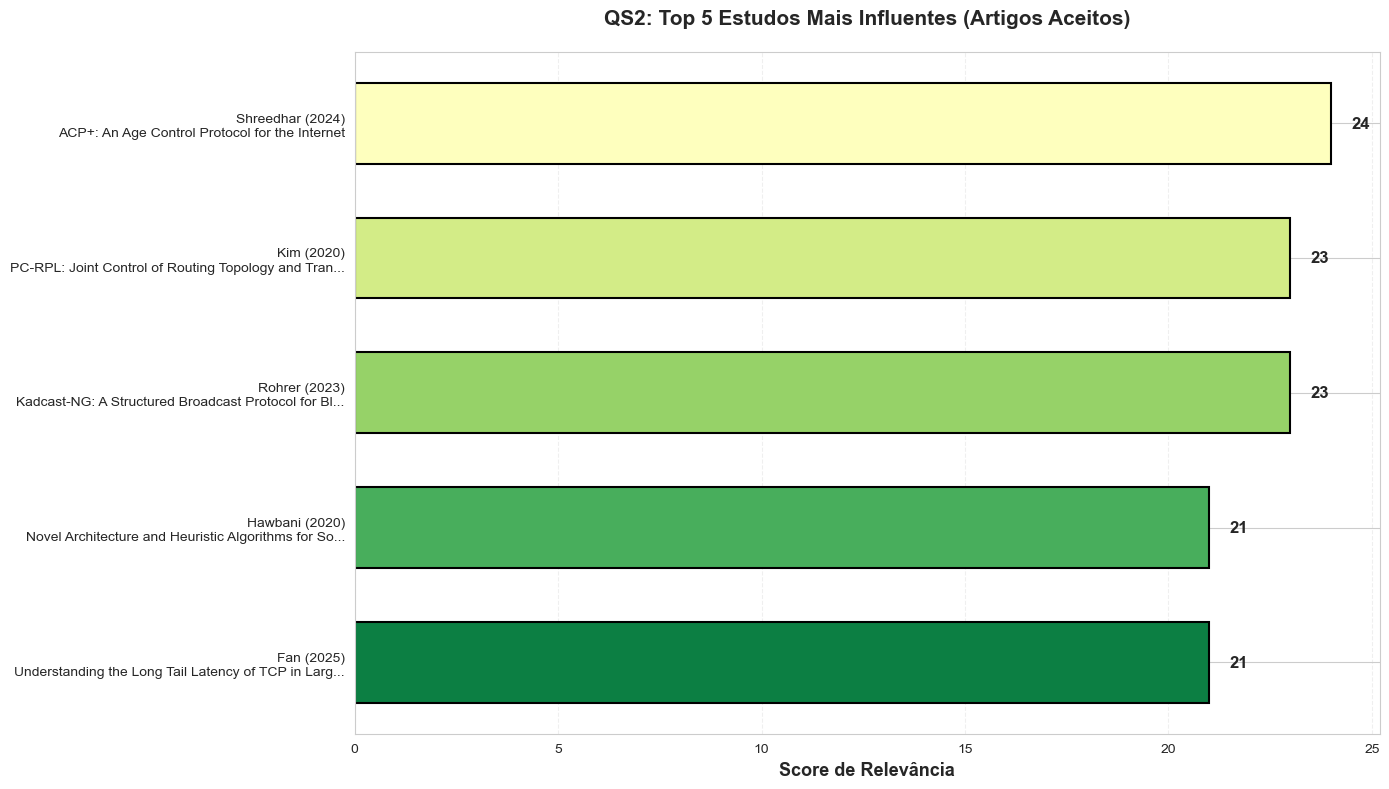

TOP 5 ESTUDOS MAIS INFLUENTES (ACEITOS)

1. [Score: 24]
   Título: ACP+: An Age Control Protocol for the Internet
   Autor(es): Shreedhar, Tanya and Kaul, Sanjit K. and Yates, Roy D.
   Journal: IEEE/ACM Trans. Netw.
   Ano: 2024

2. [Score: 23]
   Título: PC-RPL: Joint Control of Routing Topology and Transmission Power in Real Low-Power and Lossy Networks
   Autor(es): Kim, Hyung-Sin and Paek, Jeongyeup and Culler, David E. and Bahk, Saewoong
   Journal: ACM Trans. Sen. Netw.
   Ano: 2020

3. [Score: 23]
   Título: Kadcast-NG: A Structured Broadcast Protocol for Blockchain Networks
   Autor(es): Rohrer, Elias and Tschorsch, Florian
   Journal: IEEE/ACM Trans. Netw.
   Ano: 2023

4. [Score: 21]
   Título: Novel Architecture and Heuristic Algorithms for Software-Defined Wireless Sensor Networks
   Autor(es): Hawbani, Ammar and Wang, Xingfu and Zhao, Liang and Al-Dubai, Ahmed and Min, Geyong and Busaileh, Omar
   Journal: IEEE/ACM Trans. Netw.
   Ano: 2020

5. [Score: 21]
   Título: Unde

In [ ]:
sns.set_style("whitegrid")

df_aceitos = accepted.copy()

def calcular_score_relevancia(row):
    score = 0
    if pd.notna(row['doi']) and row['doi'] != '': score += 10
    if pd.notna(row['year']):
        ano = int(row['year'])
        if ano >= 2024: score += 5
        elif ano >= 2023: score += 4
        elif ano >= 2022: score += 3
        else: score += 2
    if pd.notna(row['abstract']) and len(str(row['abstract'])) > 50: score += 3
    if pd.notna(row['keywords']) or pd.notna(row['author_keywords']): score += 2
    if pd.notna(row['url']) and row['url'] != '': score += 1
    if pd.notna(row['journal']):
        journal_lower = str(row['journal']).lower()
        if any(termo in journal_lower for termo in ['ieee', 'acm', 'springer', 'elsevier']):
            score += 5
    return score

df_aceitos['relevance_score'] = df_aceitos.apply(calcular_score_relevancia, axis=1)
top_5 = df_aceitos.nlargest(5, 'relevance_score').reset_index(drop=True)

plt.figure(figsize=(14, 8))

labels = []
for idx, row in top_5.iterrows():
    autor = str(row['author']).split(',')[0] if pd.notna(row['author']) else 'N/A'
    ano = int(row['year']) if pd.notna(row['year']) else 'N/A'
    titulo = str(row['title'])[:50] + '...' if len(str(row['title'])) > 50 else str(row['title'])
    labels.append(f"{autor} ({ano})\n{titulo}")

colors = plt.cm.RdYlGn(np.linspace(0.5, 0.95, 5))
bars = plt.barh(range(5), top_5['relevance_score'].values, 
                color=colors, edgecolor='black', linewidth=1.5, height=0.6)

for i, (bar, value) in enumerate(zip(bars, top_5['relevance_score'].values)):
    plt.text(value + 0.5, i, f'{int(value)}', va='center', 
             fontweight='bold', fontsize=12)

plt.yticks(range(5), labels, fontsize=10)
plt.xlabel('Score de Relevância', fontsize=13, fontweight='bold')
plt.title('QS2: Top 5 Estudos Mais Influentes (Artigos Aceitos)', 
          fontsize=15, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.savefig('qs2_top5_aceitos.png', dpi=300, bbox_inches='tight')
plt.show()

print("TOP 5 ESTUDOS MAIS INFLUENTES (ACEITOS)\n" + "="*80)
for i, row in top_5.iterrows():
    print(f"\n{i+1}. [Score: {row['relevance_score']}]")
    print(f"   Título: {row['title']}")
    print(f"   Autor(es): {row['author']}")
    print(f"   Journal: {row['journal']}")
    print(f"   Ano: {int(row['year']) if pd.notna(row['year']) else 'N/A'}")

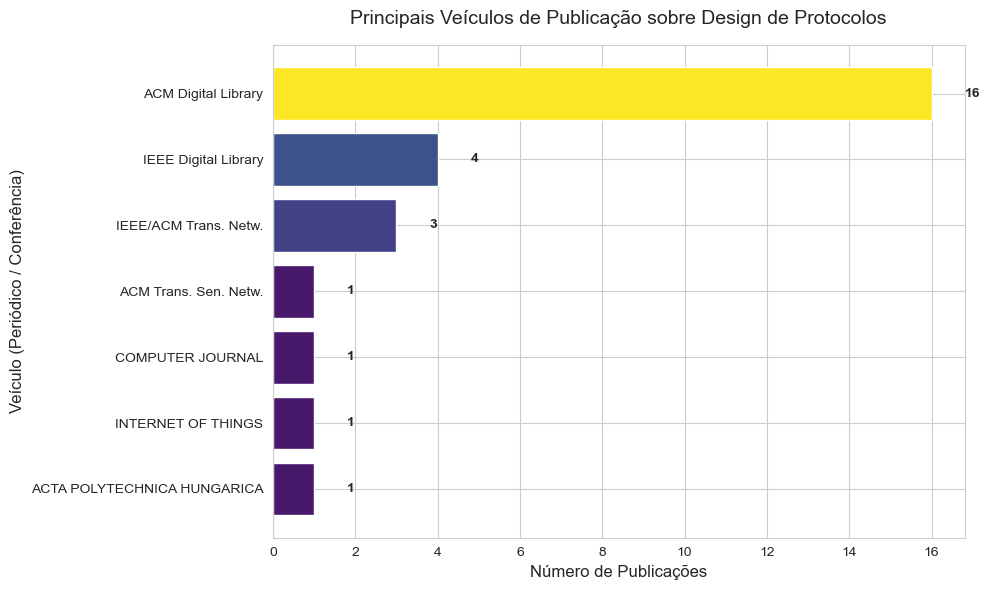


🔍 Top 7 veículos por número de publicações:
venue
ACM Digital Library            16
IEEE Digital Library            4
IEEE/ACM Trans. Netw.           3
ACM Trans. Sen. Netw.           1
COMPUTER JOURNAL                1
INTERNET OF THINGS              1
ACTA POLYTECHNICA HUNGARICA     1


In [87]:
df_aceitos = accepted
df_clean = accepted.copy()
df_clean['venue'] = df_clean['journal'].fillna(df_clean['source'])

df_clean['venue'] = df_clean['venue'].astype(str).str.strip()
df_clean = df_clean[df_clean['venue'].notna() & (df_clean['venue'] != '') & (df_clean['venue'] != 'nan')]

venue_counts = df_clean['venue'].value_counts()
top_n = 15
top_venues = venue_counts.head(top_n)

plt.figure(figsize=(10, max(6, top_n * 0.4)))  
bars = plt.barh(top_venues.index, top_venues.values, color=plt.cm.viridis(top_venues.values / max(top_venues.values)))

for i, (venue, count) in enumerate(top_venues.items()):
    plt.text(count + 0.05 * max(top_venues.values), i, str(count),
             va='center', ha='left', fontweight='bold')

plt.xlabel('Número de Publicações', fontsize=12)
plt.ylabel('Veículo (Periódico / Conferência)', fontsize=12)
plt.title('Principais Veículos de Publicação sobre Design de Protocolos', fontsize=14, pad=15)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

print("\n🔍 Top", len(top_venues), "veículos por número de publicações:")
print(top_venues.to_string())

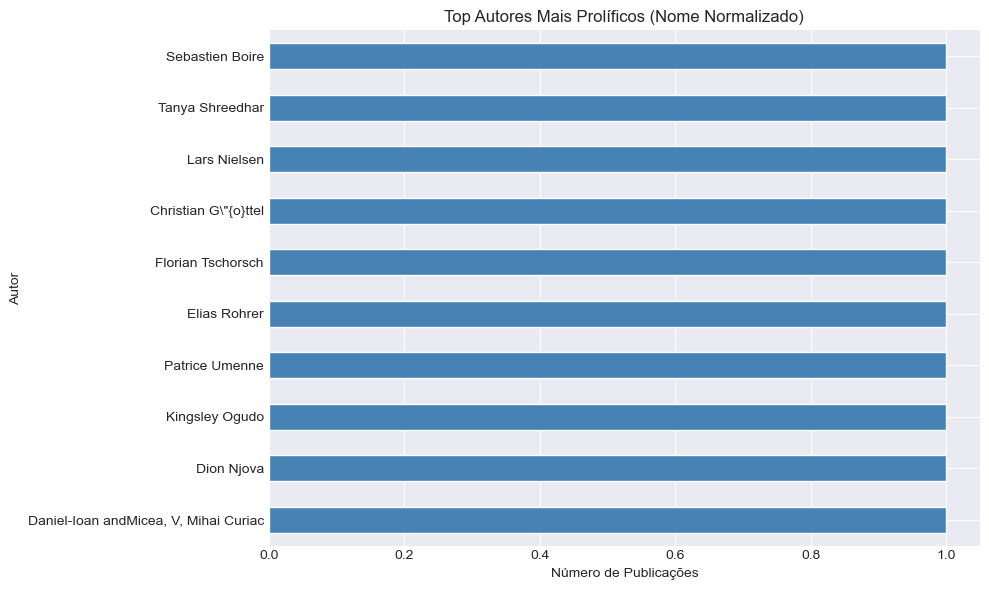


Top autores (nome normalizado):
author
Sebastien Boire                          1
Tanya Shreedhar                          1
Lars Nielsen                             1
Christian G\"{o}ttel                     1
Florian Tschorsch                        1
Elias Rohrer                             1
Patrice Umenne                           1
Kingsley Ogudo                           1
Dion Njova                               1
Daniel-Ioan andMicea, V, Mihai Curiac    1
Name: count, dtype: int64


In [118]:
def parse_author_fullname(author_str):
    if pd.isna(author_str) or not isinstance(author_str, str):
        return []
    authors = []
    parts = author_str.replace(' and ', ';').split(';')
    for part in parts:
        part = part.strip()
        if ',' in part:
            surname, given = [x.strip() for x in part.split(',', 1)]
            fullname = f"{given} {surname}".strip()
        else:
            fullname = part
        if fullname:
            authors.append(fullname)
    return authors

all_authors = accepted['author'].dropna().apply(parse_author_fullname).explode()

author_counts = all_authors.value_counts()

top_n = 10
top_authors = author_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh', color='steelblue')
plt.gca().invert_yaxis()
plt.title('Top Autores Mais Prolíficos (Nome Normalizado)')
plt.xlabel('Número de Publicações')
plt.ylabel('Autor')
plt.tight_layout()
plt.show()

print("\nTop autores (nome normalizado):")
print(top_authors)

1         Sebastien Boire
1      Tolgahan Akg\"{u}n
1        Philip Ginzboorg
1          Pekka Laitinen
1        Sandeep Tamrakar
              ...        
222          Weiyang Wang
222     Christopher Canel
222     Srinivasan Seshan
222       Alex C. Snoeren
222      Peter Steenkiste
Name: author, Length: 132, dtype: object

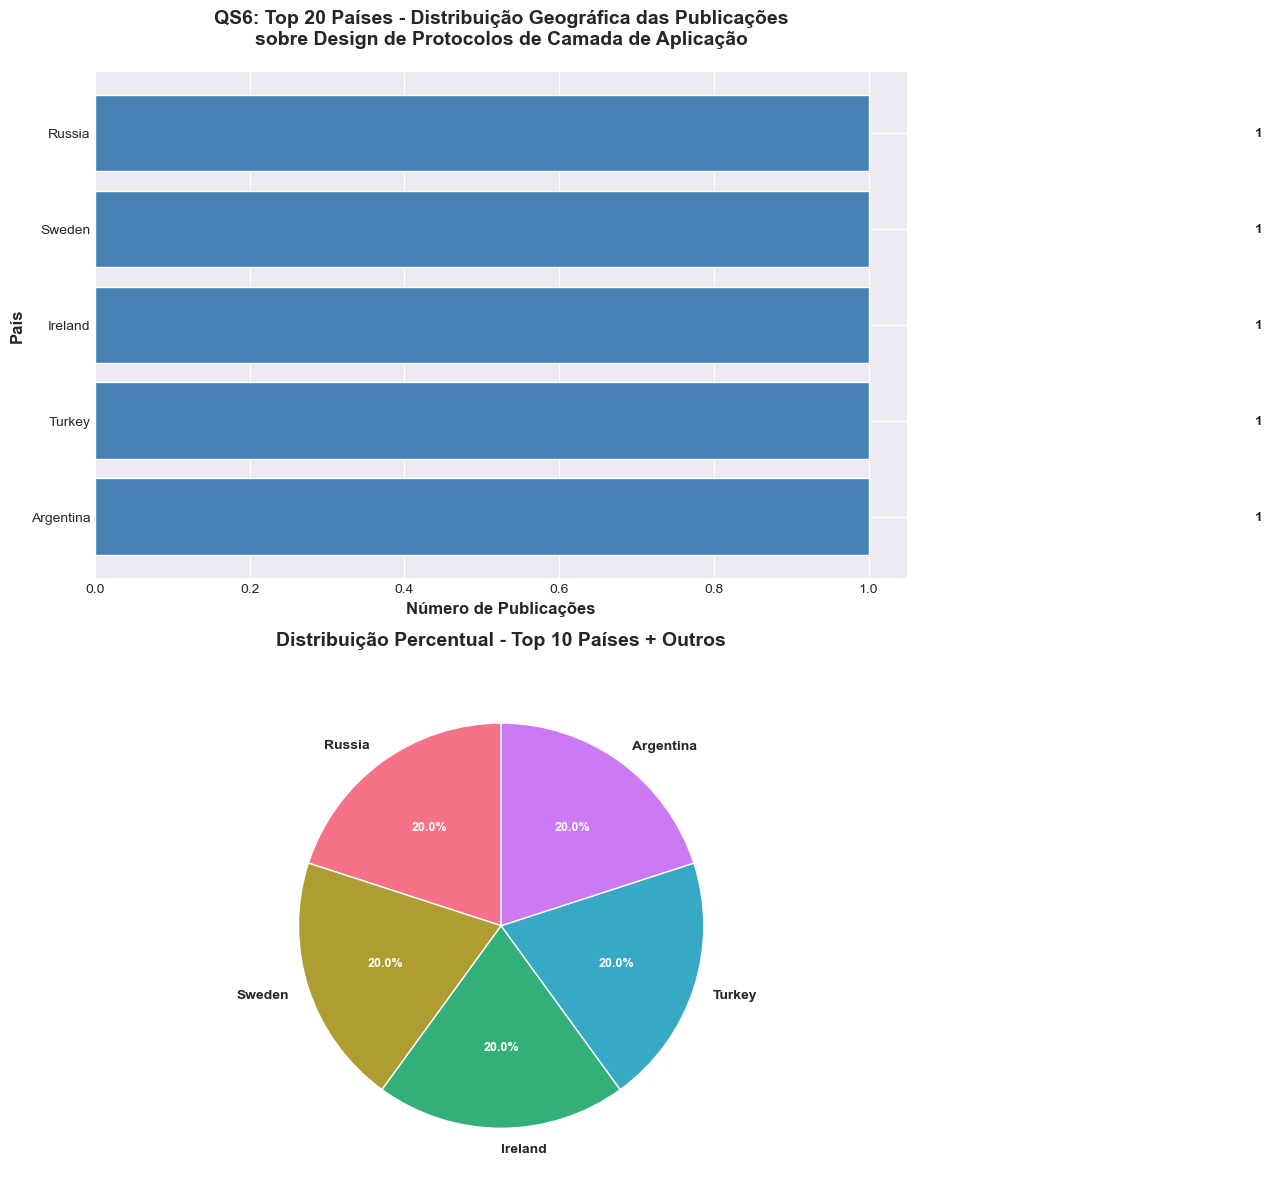


ANÁLISE GEOGRÁFICA DAS PUBLICAÇÕES

Total de publicações com informação geográfica: 5
Número de países únicos identificados: 5

Top 10 países com mais publicações:
     País  Número de Publicações
   Russia                      1
   Sweden                      1
  Ireland                      1
   Turkey                      1
Argentina                      1

DISTRIBUIÇÃO POR CONTINENTE
Europa: 2 (40.0%)
América do Sul: 1 (20.0%)
Ásia: 1 (20.0%)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def extract_countries(affiliation_text):
    if pd.isna(affiliation_text):
        return []
    
    countries = {
        'Brazil': ['Brazil', 'Brasil'],
        'USA': ['United States', 'USA', 'U.S.A', 'U.S.'],
        'China': ['China', 'P.R. China', 'PRC'],
        'United Kingdom': ['United Kingdom', 'UK', 'England', 'Scotland', 'Wales'],
        'Germany': ['Germany', 'Deutschland'],
        'France': ['France'],
        'India': ['India'],
        'Canada': ['Canada'],
        'Australia': ['Australia'],
        'Japan': ['Japan'],
        'South Korea': ['South Korea', 'Korea'],
        'Italy': ['Italy', 'Italia'],
        'Spain': ['Spain', 'España'],
        'Netherlands': ['Netherlands', 'The Netherlands'],
        'Sweden': ['Sweden'],
        'Switzerland': ['Switzerland'],
        'Singapore': ['Singapore'],
        'Russia': ['Russia', 'Russian Federation'],
        'Mexico': ['Mexico', 'México'],
        'Argentina': ['Argentina'],
        'Portugal': ['Portugal'],
        'Belgium': ['Belgium'],
        'Austria': ['Austria'],
        'Denmark': ['Denmark'],
        'Norway': ['Norway'],
        'Finland': ['Finland'],
        'Poland': ['Poland'],
        'Turkey': ['Turkey'],
        'Israel': ['Israel'],
        'Saudi Arabia': ['Saudi Arabia'],
        'South Africa': ['South Africa'],
        'New Zealand': ['New Zealand'],
        'Ireland': ['Ireland'],
        'Greece': ['Greece'],
        'Czech Republic': ['Czech Republic'],
    }
    
    found_countries = []
    affiliation_upper = str(affiliation_text).upper()
    
    for country, variations in countries.items():
        for variation in variations:
            if variation.upper() in affiliation_upper:
                found_countries.append(country)
                break
    
    return found_countries

all_countries = []
for affiliation in df['affiliation']:
    countries = extract_countries(affiliation)
    all_countries.extend(countries)

country_counts = Counter(all_countries)
country_df = pd.DataFrame(country_counts.items(), 
                          columns=['País', 'Número de Publicações'])
country_df = country_df.sort_values('Número de Publicações', ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

top_20 = country_df.head(20)
axes[0].barh(top_20['País'], top_20['Número de Publicações'], color='steelblue')
axes[0].set_xlabel('Número de Publicações', fontsize=12, fontweight='bold')
axes[0].set_ylabel('País', fontsize=12, fontweight='bold')
axes[0].set_title('QS6: Top 20 Países - Distribuição Geográfica das Publicações\nsobre Design de Protocolos de Camada de Aplicação', 
                  fontsize=14, fontweight='bold', pad=20)
axes[0].invert_yaxis()

for i, (idx, row) in enumerate(top_20.iterrows()):
    axes[0].text(row['Número de Publicações'] + 0.5, i, 
                 f"{int(row['Número de Publicações'])}", 
                 va='center', fontweight='bold')

top_10 = country_df.head(10)
outros = country_df.iloc[10:]['Número de Publicações'].sum()

if outros > 0:
    plot_data = pd.concat([
        top_10,
        pd.DataFrame([{'País': 'Outros', 'Número de Publicações': outros}])
    ])
else:
    plot_data = top_10

colors = sns.color_palette("husl", len(plot_data))
wedges, texts, autotexts = axes[1].pie(plot_data['Número de Publicações'], 
                                         labels=plot_data['País'],
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         colors=colors)

for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')

axes[1].set_title('Distribuição Percentual - Top 10 Países + Outros', 
                  fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('distribuicao_geografica_publicacoes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("ANÁLISE GEOGRÁFICA DAS PUBLICAÇÕES")
print("="*60)
print(f"\nTotal de publicações com informação geográfica: {len(all_countries)}")
print(f"Número de países únicos identificados: {len(country_counts)}")
print(f"\nTop 10 países com mais publicações:")
print(country_df.head(10).to_string(index=False))

continents = {
    'América do Norte': ['USA', 'Canada', 'Mexico'],
    'América do Sul': ['Brazil', 'Argentina'],
    'Europa': ['United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 
               'Netherlands', 'Sweden', 'Switzerland', 'Belgium', 'Austria',
               'Denmark', 'Norway', 'Finland', 'Poland', 'Portugal', 'Ireland',
               'Greece', 'Czech Republic'],
    'Ásia': ['China', 'Japan', 'South Korea', 'India', 'Singapore', 
             'Saudi Arabia', 'Israel', 'Turkey'],
    'Oceania': ['Australia', 'New Zealand'],
    'África': ['South Africa']
}

continent_counts = {}
for continent, countries_list in continents.items():
    count = sum(country_counts.get(country, 0) for country in countries_list)
    if count > 0:
        continent_counts[continent] = count

print(f"\n{'='*60}")
print("DISTRIBUIÇÃO POR CONTINENTE")
print("="*60)
for continent, count in sorted(continent_counts.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(all_countries)) * 100
    print(f"{continent}: {count} ({percentage:.1f}%)")

print("\n" + "="*60)

In [ ]:
pip install wordcloud

,bibtex_key,title,author,journal,year,source,pages,volume,abstract,document_type,...,language,note,selection_criteria,created_at,updated_at,created_by,updated_by,status,comments,relevance_score
1,NaN,Credential Provisioning and Device Configurati...,"Boire, Sebastien and Akg\""{u}n, Tolgahan and G...",NaN,2021,ACM Digital Library,87–96,NaN,The Extensible Authentication Protocol (EAP) i...,NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456910,45965.969988,fernandoareias,fernandoareias,Accepted,NaN,18
2,NaN,Extending the ns-3 QUIC Module,"Paro, Umberto and Chiariotti, Federico and Des...",NaN,2020,ACM Digital Library,19–26,NaN,The recently proposed QUIC protocol has been w...,NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456910,45966.735833,fernandoareias,fernandoareias,Accepted,NaN,18
23,NaN,Do we want the New Old Internet? Towards Seaml...,"Safronov, Vadim and Brazauskas, Justas and Dan...",NaN,2021,ACM Digital Library,185–191,NaN,IoT is developing rapidly with frequently appe...,NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456910,45966.603125,fernandoareias,fernandoareias,Accepted,NaN,16
28,NaN,PC-RPL: Joint Control of Routing Topology and ...,"Kim, Hyung-Sin and Paek, Jeongyeup and Culler,...",ACM Trans. Sen. Netw.,2020,ACM Digital Library,NaN,16.0,"We present PC-RPL, a transmission power-contro...",NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456910,45972.870984,fernandoareias,fernandoareias,Accepted,NaN,23
29,NaN,Named-Data Transport: An End-to-End Approach f...,"Albalawi, Abdulazaz and Garcia-Luna-Aceves, J. J.",NaN,2020,ACM Digital Library,136–148,NaN,Named-Data Transport (NDT) is introduced to pr...,NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456910,45973.663495,fernandoareias,fernandoareias,Accepted,NaN,18
42,NaN,WiPoTS: An Application Layer Protocol With Net...,"Farooq, Muhammad Omer",COMPUTER JOURNAL,2023,Web of Science,2108-2117,67.0,"Nowadays, a far-field wireless power transfer ...",Article,...,English,NaN,Estudos que tratam do design de novos protocol...,45939.459514,45973.665787,fernandoareias,fernandoareias,Accepted,NaN,19
49,NaN,Design and Evaluation of Lightweight Network P...,"Ma, Zhichao and Bai, Xiaomeng and Qi, Tingyu a...",NaN,2025,IEEE Digital Library,548-553,NaN,According to the problem of a more urgent need...,NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456991,45966.405764,fernandoareias,fernandoareias,Accepted,NaN,20
98,NaN,Bladerunner: Stream Processing at Scale for a ...,"Barber, Jeff and Yu, Ximing and Zamore, Laney ...",NaN,2021,ACM Digital Library,708–723,NaN,Consider a social media platform with hundreds...,NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456910,45962.952789,fernandoareias,fernandoareias,Accepted,NaN,18
109,NaN,ASMesh: Anonymous and Secure Messaging in Mesh...,"Bienstock, Alexander and R\""{o}sler, Paul and ...",NaN,2023,ACM Digital Library,1–15,NaN,"The majority of secure messengers have single,...",NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456910,45962.900127,fernandoareias,fernandoareias,Accepted,NaN,18
119,NaN,Novel Architecture and Heuristic Algorithms fo...,"Hawbani, Ammar and Wang, Xingfu and Zhao, Lian...",IEEE/ACM Trans. Netw.,2020,ACM Digital Library,2809–2822,28.0,This article extends the promising software-de...,NaN,...,NaN,NaN,Estudos que tratam do design de novos protocol...,45939.456910,45972.982766,fernandoareias,fernandoareias,Accepted,NaN,21


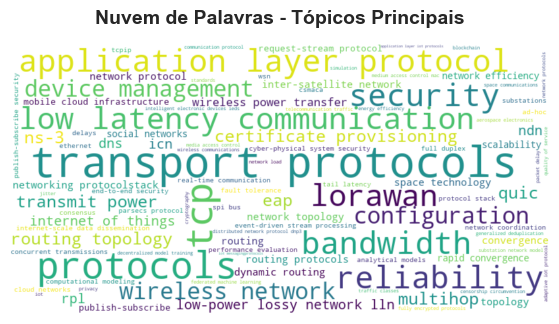


ANÁLISE DE TÓPICOS, PALAVRAS-CHAVE E ÁREAS DE INTERESSE

📊 ESTATÍSTICAS GERAIS:
──────────────────────────────────────────────────────────────────────
Total de palavras-chave identificadas: 131
Número de palavras-chave únicas: 118
Média de ocorrências por palavra-chave: 1.11
Mediana de ocorrências: 1

🔝 TOP 30 PALAVRAS-CHAVE MAIS FREQUENTES:
──────────────────────────────────────────────────────────────────────
                      Palavra-chave  Frequência
                transport protocols           4
                                tcp           3
                          protocols           3
         application layer protocol           2
          low latency communication           2
                           security           2
                          bandwidth           2
                        reliability           2
                            lorawan           2
              aerospace electronics           1
                             jitter           1
        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

def process_keywords(text):
    if pd.isna(text):
        return []
    
    text = str(text).lower()
    keywords = re.split(r'[;,|]', text)
    cleaned = []
    for kw in keywords:
        kw = kw.strip()
        kw = re.sub(r'[^\w\s-]', '', kw)
        if kw and len(kw) > 2:
            cleaned.append(kw)
    return cleaned

all_keywords = []

for keywords in accepted['author_keywords']:
    all_keywords.extend(process_keywords(keywords))

for keywords in accepted['keywords']:
    all_keywords.extend(process_keywords(keywords))

keyword_counts = Counter(all_keywords)

stopwords = {'the', 'and', 'for', 'with', 'from', 'this', 'that', 'using', 
             'based', 'system', 'systems', 'method', 'methods', 'approach'}

keyword_counts = {k: v for k, v in keyword_counts.items() if k not in stopwords}

# Criar DataFrame com palavras-chave
keywords_df = pd.DataFrame(keyword_counts.items(), 
                           columns=['Palavra-chave', 'Frequência'])
keywords_df = keywords_df.sort_values('Frequência', ascending=False)

def categorize_keyword(keyword):
    keyword = keyword.lower()
    
    categories = {
        'Segurança': ['security', 'encryption', 'authentication', 'privacy', 
                      'cryptography', 'firewall', 'vulnerability', 'attack',
                      'secure', 'protection', 'authorization', 'ssl', 'tls'],
        'IoT': ['iot', 'internet of things', 'sensor', 'smart', 'embedded',
                'wireless sensor', 'mqtt', 'coap'],
        'Redes': ['network', 'routing', 'tcp', 'udp', 'ip', 'protocol',
                  'communication', 'transmission', 'bandwidth', 'qos',
                  'latency', 'throughput'],
        'Web': ['http', 'https', 'web', 'rest', 'api', 'restful',
                'soap', 'microservices', 'websocket'],
        'Cloud/Distribuído': ['cloud', 'distributed', 'edge computing',
                              'fog computing', 'scalability', 'load balancing'],
        'Dados': ['data', 'database', 'storage', 'big data', 'streaming',
                  'serialization', 'json', 'xml'],
        'Performance': ['performance', 'optimization', 'efficiency', 
                        'speed', 'latency', 'throughput', 'scalability'],
        'Machine Learning/AI': ['machine learning', 'artificial intelligence',
                                'neural network', 'deep learning', 'ai', 'ml'],
        'Blockchain': ['blockchain', 'distributed ledger', 'smart contract',
                       'cryptocurrency', 'bitcoin', 'ethereum']
    }
    
    for category, terms in categories.items():
        for term in terms:
            if term in keyword:
                return category
    
    return 'Outros'

categories_list = []
for kw, count in keyword_counts.items():
    category = categorize_keyword(kw)
    categories_list.extend([category] * count)

category_counts = Counter(categories_list)
categories_df = pd.DataFrame(category_counts.items(),
                             columns=['Área de Interesse', 'Frequência'])
categories_df = categories_df.sort_values('Frequência', ascending=False)

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

ax2 = fig.add_subplot(gs[1, 0])
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white',
                      colormap='viridis',
                      max_words=100,
                      relative_scaling=0.5).generate_from_frequencies(keyword_counts)
ax2.imshow(wordcloud, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Nuvem de Palavras - Tópicos Principais', 
              fontsize=14, fontweight='bold', pad=15)

plt.show()

print("\n" + "="*70)
print("ANÁLISE DE TÓPICOS, PALAVRAS-CHAVE E ÁREAS DE INTERESSE")
print("="*70)

print(f"\n📊 ESTATÍSTICAS GERAIS:")
print(f"{'─'*70}")
print(f"Total de palavras-chave identificadas: {len(all_keywords)}")
print(f"Número de palavras-chave únicas: {len(keyword_counts)}")
print(f"Média de ocorrências por palavra-chave: {np.mean(list(keyword_counts.values())):.2f}")
print(f"Mediana de ocorrências: {np.median(list(keyword_counts.values())):.0f}")

print(f"\n🔝 TOP 30 PALAVRAS-CHAVE MAIS FREQUENTES:")
print(f"{'─'*70}")
print(keywords_df.head(30).to_string(index=False))

print(f"\n📚 DISTRIBUIÇÃO POR ÁREAS DE INTERESSE:")
print(f"{'─'*70}")
for idx, row in categories_df.iterrows():
    percentage = (row['Frequência'] / sum(categories_df['Frequência'])) * 100
    print(f"{row['Área de Interesse']:.<30} {row['Frequência']:>6} ({percentage:>5.1f}%)")

print(f"\n🔗 ANÁLISE DE COMBINAÇÕES FREQUENTES:")
print(f"{'─'*70}")

multi_word_keywords = [kw for kw in keyword_counts.keys() if ' ' in kw]
multi_word_counts = {kw: keyword_counts[kw] for kw in multi_word_keywords}
multi_word_sorted = sorted(multi_word_counts.items(), key=lambda x: x[1], reverse=True)

print("Top 15 palavras-chave compostas:")
for kw, count in multi_word_sorted[:15]:
    print(f"  • {kw}: {count}")

In [5]:
df_extraction = pd.read_excel('/Users/fernandoareias/Documents/dev/mestrado/disciplinas/PPGA41/exports/data_extraction.xls')
df_extraction

,article,Autores,Data da Publicação,País da Publicação,Quantidade de Citações,Metodologia,Nome do novo protocolo,Objetivo do novo protocolo,Simulador Utilizado,Universidades,Dominio
0,DecFL: An Ubiquitous Decentralized Model Train...,"Felix Morsbach, Salman Toor",06/07/2022,"Germany, Sweden",5,Empirica baseado em teoria,DecFL,O objetivo central do novo protocolo e *framew...,NaN,"Karlsruhe Institute of Technology, Uppsala Uni...",P2P
1,Credential Provisioning and Device Configurati...,"Sebastien Boire, Tolgahan Akgün, Philip Ginzbo...",11/22/2021,"Finland, Finland, Finland, Finland, Finland, F...",1,Empirica baseado em teoria,NaN,"O objetivo dos novos protocolos, **EAP-oPROV**...",NaN,"Aalto University, F-Secure, Huawei, Huawei, Hu...",IoT
2,ACP+: An Age Control Protocol for the Internet,"Tanya Shreedhar, Sanjit K. Kaul, Roy D. Yates",10/22/2022,"UK, India, EUA",14,Empirica baseado em teoria,ACP+,O ACP+ (Age Control Protocol) é um protocolo d...,Próprio,"The University of Edinburgh, IIIT-Delhi, Rutge...",IoT
3,Understanding the Long Tail Latency of TCP in ...,"Zihao Fan, Enge Song, Bo Jiang, Yang Song, Yuk...",07/08/2025,"China, China, China, China, China, China, Chin...",0,Empirica baseado em teoria,Bifrost,"Este artigo propõe o Bifrost, um novo protocol...",VM,"Shanghai Jiao Tong University, Alibaba Cloud, ...",Geral
4,Bytes to Schlep? Use a FEP: Hiding Protocol Me...,"Ellis Fenske, Aaron Johnson",06/09/2024,"EUA, EUA",7,Empirica baseado em teoria,NaN,O objetivo central das novas construções de pr...,NaN,"U.S. Naval Academy, U.S. Naval Research Labora...",VPN
5,Kadcast-NG: A Structured Broadcast Protocol fo...,"Elias Rohrer, Florian Tschorsch",10/08/2019,"Germany, Germany",57,Empirica baseado em teoria,Kadcast,O principal **objetivo do novo protocolo Kadca...,Blockchain Network Simulator (BNS),"Technical University of Berlin, Technical Univ...",blockchain
6,Asynchronous In-band Full-Duplex Transmission ...,"Di Tang,Chaoxian Zhang, Rui Song",11/08/2020,"China, China, China",2,Empirica baseado em teoria,Protocolo de Camada MAC Full-Duplex Assíncrono...,resolver os problemas de protocolos full-duple...,OMNeT++,"Xiamen University Tan Kah Kee College, Xiamen ...",MAC
7,Hydra: Concurrent Coordination for Fault-toler...,"A. Biri, R. Da Forno, T. Kuonen, F. Mager, M. ...",05/09/2023,"Switzerland, Switzerland, Switzerland, Germany...",1,Empirica baseado em teoria,Hydra,"O objetivo central do novo protocolo, **Hydra*...",NaN,"ETH Zurich, ETH Zurich, ETH Zurich, TU Dresden...",Wireless
8,PC-RPL: Joint Control of Routing Topology and ...,"HYUNG-SIN KIM, JEONGYEUP PAEK, DAVID E. CULLER...",03/01/2020,"EUA, South Korea, EUA, South Korea",20,Empirica baseado em teoria,Power-Controlled RPL,O objetivo principal do novo protocolo **PC-RP...,NaN,"University of California Berkeley, Chung-Ang U...",IoT
9,Named-Data Transport: An End-to-End Approach f...,"Albalawi Abdulazaz, Garcia-Luna-Aceves J. J.",09/22/2020,"EUA, EUA",6,Empirica baseado em teoria,Protocolo de Internet Tátil de Multi-conexão (...,"O objetivo do novo protocolo, o **Protocolo de...",Spin,"University of California Santa Cruz, Universit...",CDN


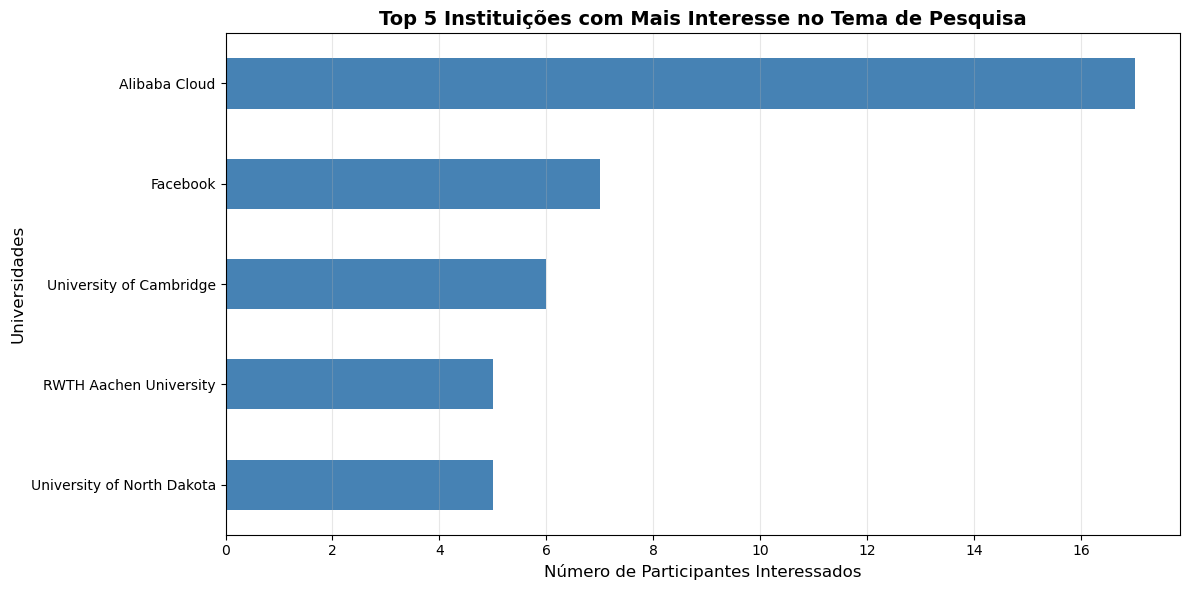

Top 5 Instituições:
Alibaba Cloud                 17
Facebook                       7
University of Cambridge        6
RWTH Aachen University         5
University of North Dakota     5
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

universidades_list = []

for universidades in df_extraction['Universidades'].dropna():
    unis = [uni.strip() for uni in str(universidades).split(',')]
    universidades_list.extend(unis)

universidades_contagem = pd.Series(universidades_list).value_counts()

top5_universidades = universidades_contagem.head(5)

plt.figure(figsize=(12, 6))
top5_universidades.plot(kind='barh', color='steelblue')
plt.xlabel('Número de Participantes Interessados', fontsize=12)
plt.ylabel('Universidades', fontsize=12)
plt.title('Top 5 Instituições com Mais Interesse no Tema de Pesquisa', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.gca().invert_yaxis()  
plt.grid(axis='x', alpha=0.3)
plt.show()

print("Top 5 Instituições:")
print(top5_universidades)

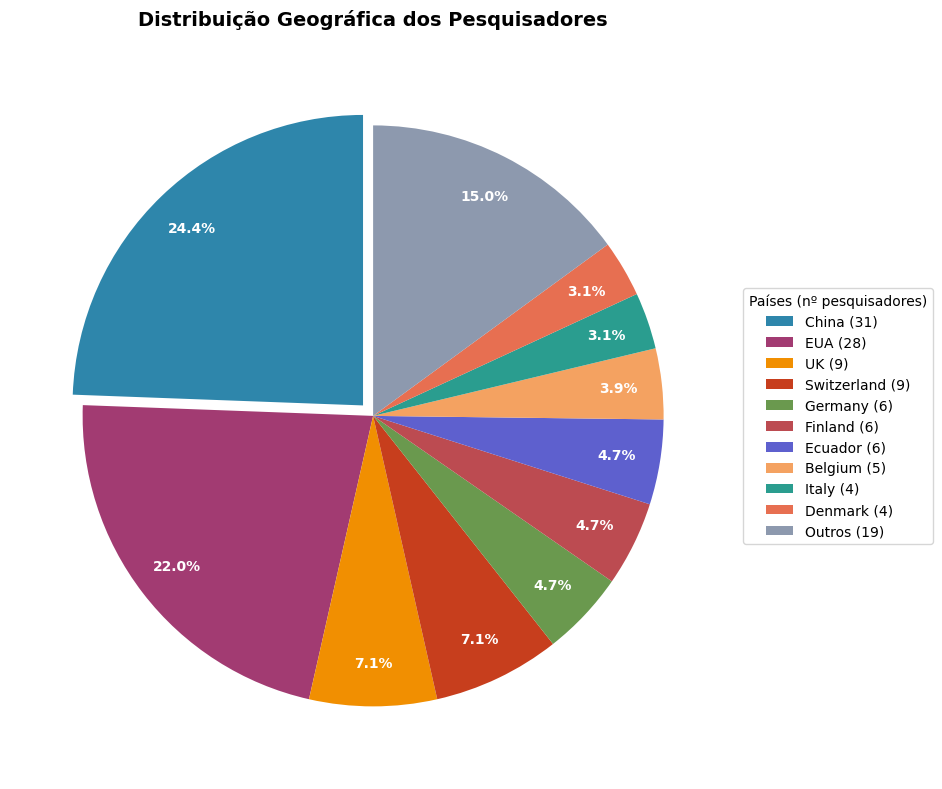

Top 10 países com mais pesquisadores:
China          31
EUA            28
UK              9
Switzerland     9
Germany         6
Finland         6
Ecuador         6
Belgium         5
Italy           4
Denmark         4
Name: count, dtype: int64

Total de países únicos: 20
Total de pesquisadores: 127


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

paises_list = []
for paises in df_extraction['País da Publicação'].dropna():
    pais_separados = [pais.strip() for pais in str(paises).split(',')]
    paises_list.extend(pais_separados)

paises_contagem = pd.Series(paises_list).value_counts()

limite = 10
if len(paises_contagem) > limite:
    top_paises = paises_contagem.head(limite)
    outros = paises_contagem.iloc[limite:].sum()
    top_paises['Outros'] = outros
    paises_para_grafico = top_paises
else:
    paises_para_grafico = paises_contagem

fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E',
          '#BC4B51', '#5E60CE', '#F4A261', '#2A9D8F', '#E76F51',
          '#8D99AE']

wedges, texts, autotexts = ax.pie(
    paises_para_grafico.values,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors[:len(paises_para_grafico)],
    pctdistance=0.85,
    explode=[0.05] + [0] * (len(paises_para_grafico) - 1)
)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

ax.legend(
    wedges,
    [f'{pais} ({count})' for pais, count in paises_para_grafico.items()],
    title="Países (nº pesquisadores)",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

plt.title('Distribuição Geográfica dos Pesquisadores', 
          fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("Top 10 países com mais pesquisadores:")
print(paises_contagem.head(10))
print(f"\nTotal de países únicos: {len(paises_contagem)}")
print(f"Total de pesquisadores: {len(paises_list)}")

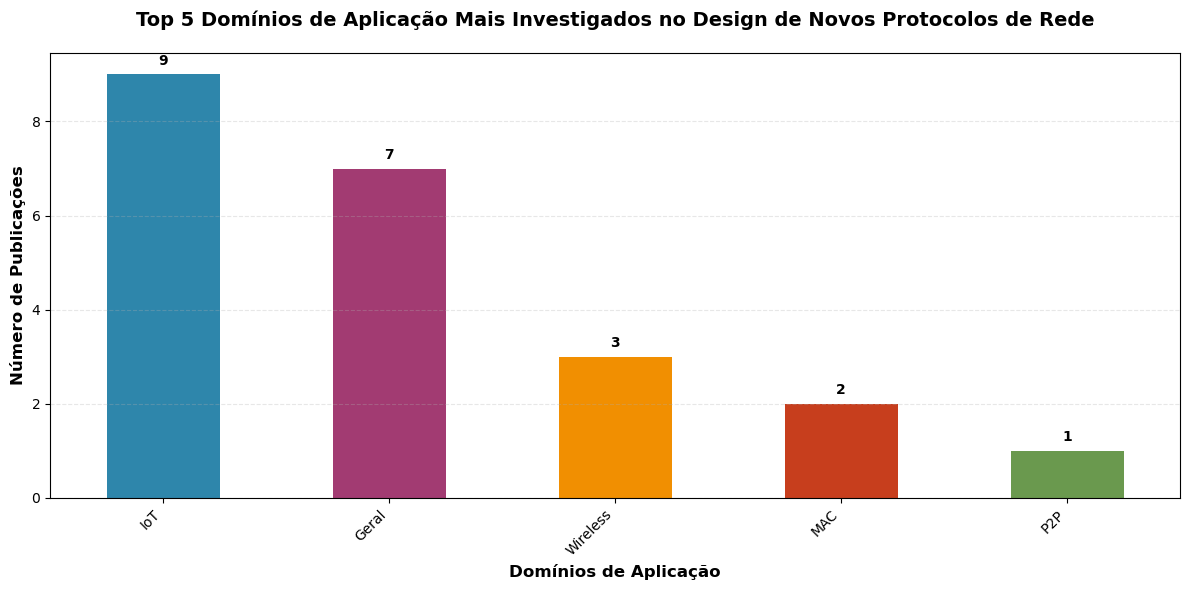

Top 5 Domínios de Aplicação:
Dominio
IoT         9
Geral       7
Wireless    3
MAC         2
P2P         1
Name: count, dtype: int64

Total de domínios únicos: 5
Total de publicações: 27


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dominios_contagem = df_extraction['Dominio'].value_counts()
top5_dominios = dominios_contagem.head(5)

plt.figure(figsize=(12, 6))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']

top5_dominios.plot(kind='bar', color=colors)
plt.xlabel('Domínios de Aplicação', fontsize=12, fontweight='bold')
plt.ylabel('Número de Publicações', fontsize=12, fontweight='bold')
plt.title('Top 5 Domínios de Aplicação Mais Investigados no Design de Novos Protocolos de Rede', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(top5_dominios):
    plt.text(i, v + 0.2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Top 5 Domínios de Aplicação:")
print(top5_dominios)
print(f"\nTotal de domínios únicos: {dominios_contagem.nunique()}")
print(f"Total de publicações: {len(df_extraction)}")

In [ ]:
import pandas as pd

tabela_protocolos = df_extraction[['Nome do novo protocolo', 'Dominio']].copy()
tabela_protocolos = tabela_protocolos.dropna()
tabela_protocolos = tabela_protocolos.reset_index(drop=True)

print(tabela_protocolos)

tabela_protocolos.to_csv('protocolos_dominios.csv', index=False, encoding='utf-8')

print("\n" + "="*80)
print(tabela_protocolos.to_string(index=False))

                               Nome do novo protocolo          Dominio
0                                               DecFL              P2P
1                                                ACP+              IoT
2                                             Bifrost            Geral
3                                             Kadcast       blockchain
4   Protocolo de Camada MAC Full-Duplex Assíncrono...              MAC
5                                               Hydra         Wireless
6                                Power-Controlled RPL              IoT
7   Protocolo de Internet Tátil de Multi-conexão (...              CDN
8                                              Hermes              IoT
9                                             ENTRUST              IoT
10  TCPLS (Modern Transport Services with TCP and ...            Geral
11                                        IP-agnostic              IoT
12                          Time-division TCP (TDTCP)            Geral
13    

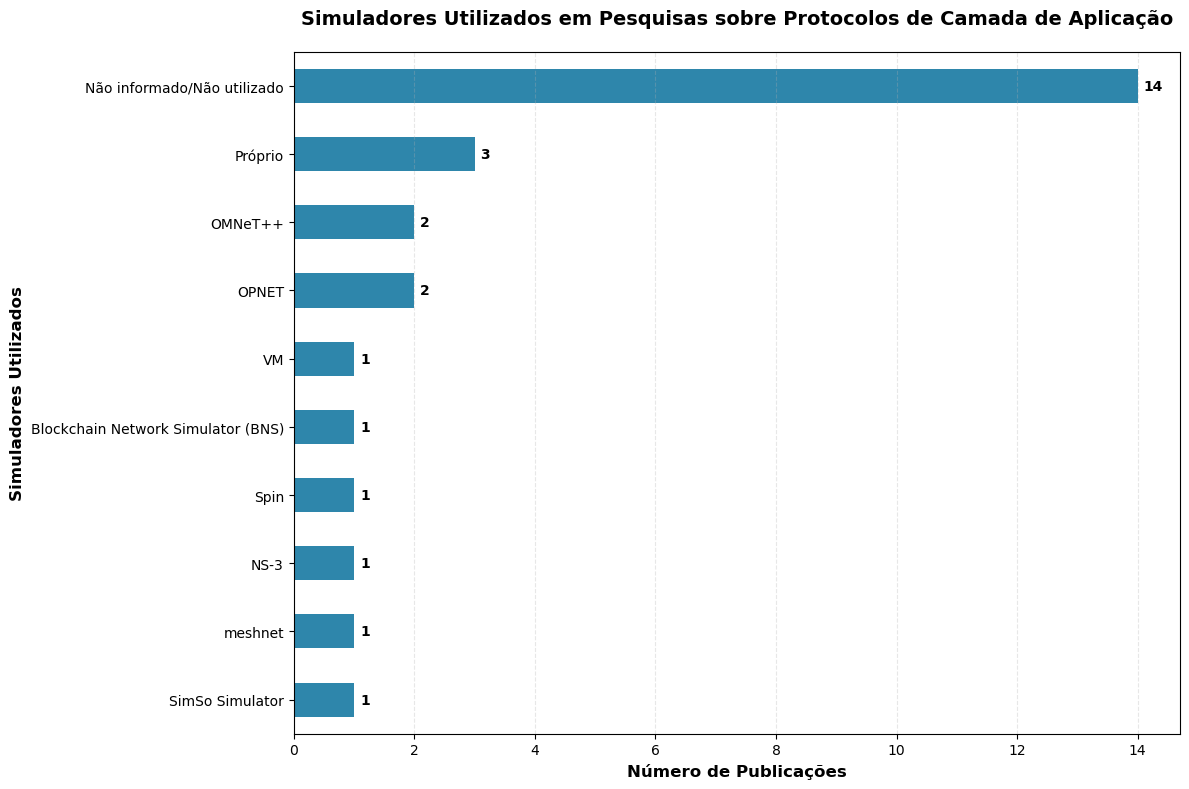

Simuladores Utilizados:
Simulador Utilizado
Não informado/Não utilizado           14
Próprio                                3
OMNeT++                                2
OPNET                                  2
VM                                     1
Blockchain Network Simulator (BNS)     1
Spin                                   1
NS-3                                   1
meshnet                                1
SimSo Simulator                        1
Name: count, dtype: int64

Total de simuladores únicos (incluindo 'Não informado'): 10
Total de publicações: 27
Publicações que informaram simulador: 13
Publicações que NÃO informaram simulador: 14


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

simuladores_contagem = df_extraction['Simulador Utilizado'].value_counts(dropna=False)
simuladores_contagem.index = simuladores_contagem.index.map(
    lambda x: 'Não informado/Não utilizado' if pd.isna(x) else x
)

top_simuladores = simuladores_contagem.head(20)

plt.figure(figsize=(12, 8))
top_simuladores.plot(kind='barh', color='#2E86AB')
plt.xlabel('Número de Publicações', fontsize=12, fontweight='bold')
plt.ylabel('Simuladores Utilizados', fontsize=12, fontweight='bold')
plt.title('Simuladores Utilizados em Pesquisas sobre Protocolos de Camada de Aplicação', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')

for i, v in enumerate(top_simuladores):
    plt.text(v + 0.1, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Simuladores Utilizados:")
print(simuladores_contagem)
print(f"\nTotal de simuladores únicos (incluindo 'Não informado'): {len(simuladores_contagem)}")
print(f"Total de publicações: {len(df_extraction)}")
print(f"Publicações que informaram simulador: {df_extraction['Simulador Utilizado'].notna().sum()}")
print(f"Publicações que NÃO informaram simulador: {df_extraction['Simulador Utilizado'].isna().sum()}")